What are the most demanded skills for the top 3 most popular Data roles

Methodlogy

1- Clean up skill column

2- Calculate skill count based on job_title_short

3- Calculate skill percentage

4- Plot final findings

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#loading dataset
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
df_US = df[df['job_country'] == 'United States']
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [3]:
df_skills = df.explode('job_skills')
df_skills[['job_skills', 'job_title_short']]

,job_skills,job_title_short
0,None,Senior Data Engineer
1,r,Data Analyst
1,python,Data Analyst
1,sql,Data Analyst
1,nosql,Data Analyst
...,...,...
785739,kafka,Data Engineer
785739,kubernetes,Data Engineer
785739,docker,Data Engineer
785740,aws,Software Engineer


In [4]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
1723,shogun,Business Analyst,1
447,delphi,Senior Data Scientist,1
2124,visualbasic,Software Engineer,1
450,digitalocean,Business Analyst,1


In [5]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

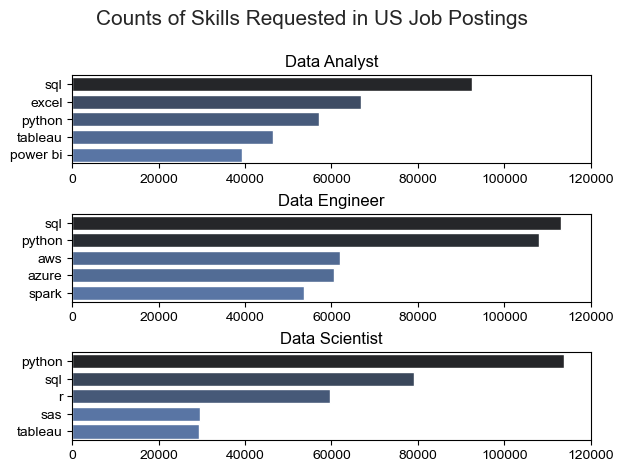

In [6]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 120000) # make all the scales same

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [7]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [8]:
# Explode job skills
df_skills = df_US.explode('job_skills')

# Drop duplicates so one job posting doesn't count a skill multiple times
df_skills_unique = df_skills.drop_duplicates(subset=['job_title_short', 'job_skills', 'job_posted_date'])

# Count how many postings mention each skill (per job title)
df_skills_count = (
    df_skills_unique.groupby(['job_skills', 'job_title_short'])
    .size()
    .reset_index(name='skill_count')
)

# Total postings per job title
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

# Merge + percentage
df_skills_percent = pd.merge(df_skills_count, df_job_title_count,
                             how='left', on='job_title_short')

df_skills_percent['skill_percentage'] = (
    df_skills_percent['skill_count'] / df_skills_percent['jobs_total']
) * 100


In [9]:
df_skills_percent.sort_values(by='skill_percentage', ascending=False, inplace=True)
df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skill_percentage
1213,python,Senior Data Scientist,9547,12946,73.744786
1212,python,Senior Data Engineer,6612,9289,71.180967
1526,sql,Senior Data Engineer,6573,9289,70.761115
1210,python,Machine Learning Engineer,642,921,69.706840
1522,sql,Data Engineer,23320,35080,66.476625
...,...,...,...,...,...
84,asp.net core,Data Analyst,1,67816,0.001475
920,msaccess,Data Analyst,1,67816,0.001475
684,ionic,Data Analyst,1,67816,0.001475
858,microsoft lists,Data Analyst,1,67816,0.001475


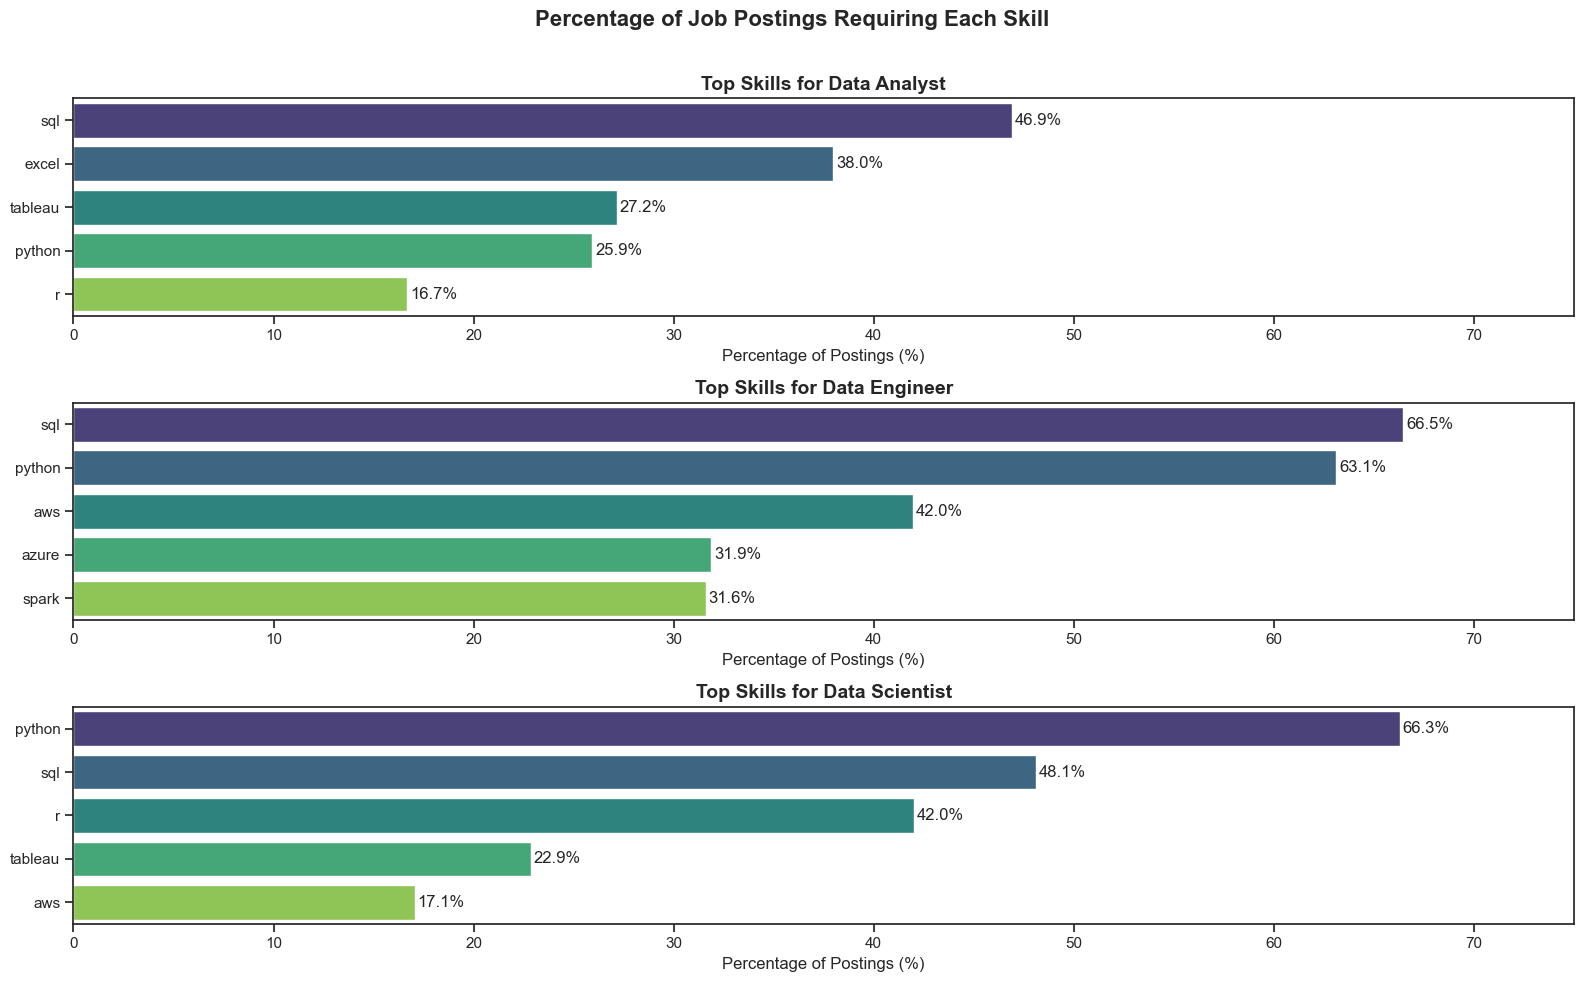

In [10]:
# 📊 Plot skill demand percentages for selected job titles

# Create subplots: one row for each job title
fig, ax = plt.subplots(len(job_titles), 1, figsize=(16, 10))

# Set a clean theme
sns.set_theme(style='whitegrid')

for i, job_title in enumerate(job_titles):
    # 🔹 Select top 5 skills for this job title (highest %)
    df_plot = (
        df_skills_percent[df_skills_percent['job_title_short'] == job_title]
        .sort_values(by="skill_percentage", ascending=False)
        .head(5) #[::-1]   # reverse so biggest bar at top
    )

    # 🔹 Barplot of skill percentages
    bars = sns.barplot(
        data=df_plot,
        x="skill_percentage",
        y="job_skills",
        ax=ax[i],
        hue="job_skills",         # set hue same as y → fixes palette warning
        palette="viridis",
        dodge=False,
        legend=False              # prevent duplicate legends
    )

    # 🔹 Customize each subplot
    ax[i].set_title(f"Top Skills for {job_title}", fontsize=14, fontweight="bold")
    ax[i].set_xlim(0, 75) # make all the scales same
    ax[i].set_xlabel("Percentage of Postings (%)", fontsize=12)
    ax[i].set_ylabel("") 

    # ✅ Add labels to all bars
    for container in ax[i].containers:
        ax[i].bar_label(container, fmt="%.1f%%", padding=2)

# 🔹 Add a main title for all plots
fig.suptitle("Percentage of Job Postings Requiring Each Skill", fontsize=16, fontweight="bold")

# Adjust spacing
fig.tight_layout(h_pad=1.0, rect=[0, 0, 1, 0.97])

plt.show()
